# Tutorial "Sensitivity_analysis.py"

Authors: [Asmae KHARRAB](mailto:asmae.kharrab@insa-lyon.fr), [Florian MERINDOL](mailto:florian.merindol@insa-lyon.fr)

[INSA Lyon](https://www.insa-lyon.fr), France, 07/01/2022

## Introduction

In order to verify the sensitivity of the Electre Tri ranking regarding the variability of parameter, this Python code [**Sensitivity_analysis.py**](Sensitivity_analysis.py), displayed below, allows to calculate the sensitivity index of parameters, then to display them.

The choice of sensitivity analysis method is developed in our report on InER project. 

## Python code presentation

The different steps of the sensitivity analysis code are presented here.

The code is organized in six parts : 
1. Copy of dictionary 
2. Modification of dictionary
3. Definition of the sensitivity index
4. Calculation of sensitivity index with methods
5. Graphic display
6. Sensitivity analysis and implementation of methods

Each part will be explained below. 

For beginning, the methods ELECTRE_Tri_B and ELECTRE_Tri_B_function and Pyplot are used in the code. 

In [16]:
import ELECTRE_Tri_B
import ELECTRE_Tri_B_function
from matplotlib import pyplot as plt

## 1. First part : Copy of dictionary

#### 1.1 Ungroup dictionary
The first step is to ungroup the dictionaries to get unitary dictionary.

The boundaries of actions performance dictionary (Bk) is in the form of dictionaries in a principal dictionary. 
The thresholds dictionary is in the form of a dictionary where values are (q,p,v) list

To modify each parameter in a single method, a single dictionary is necessary. For that, this function ungroup the two dictionnaries in unitary dictionaries. 

In [17]:
def ungroup_dict(BP, T):
    """
    Ungroup the dictionaries to get unitary dictionary

    :param BP: Dictionary containing the boundaries of actions performance 'Bk', in the form of dictionaries in a principal 
    dictionary

    :param T: Dictionary containing the pseudo-criterias q,p and v. In the form of a dictionary where values are list (q,p,v)

    :return the different ungrouped dictionaries
            """
    dict_q = {}
    dict_p = {}
    dict_v = {}

    for i in range(0, len(T)):
        dict_q[list(T.keys())[i]] = list(T.values())[i][0]
        dict_p[list(T.keys())[i]] = list(T.values())[i][1]
        dict_v[list(T.keys())[i]] = list(T.values())[i][2]

    dict_b0 = list(BP.values())[0]
    dict_b1 = list(BP.values())[1]
    dict_b2 = list(BP.values())[2]
    dict_b3 = list(BP.values())[3]
    dict_b4 = list(BP.values())[4]
    dict_b5 = list(BP.values())[5]

    return dict_q, dict_p, dict_v, dict_b0, dict_b1, dict_b2, dict_b3, dict_b4, dict_b5

#### 1.2 Gather dictionary

Once the dictionary is modified, the original dictionary (Threshold or Boundaries Action Performance) should be recreated  by gathering the different unitary dictionaries.

Two methods are defined : for pseudo-criterias and for boundaries of action performances. 

The gathered dictionary of the boundaries of action performance is created by adding unitary dictionaries. The 'index' indicates where is the modified dictionary.  

In [18]:
def gather_dictBK(Dinit, Dmodified, index, D0, D1, D2, D3, D4, D5):
    """
       Gather the Boundaries Actions Performances dictionary to use it in Electre Tri

       :param Dinit: Initial dictionary containing the form of the gathered dictionary.

       :param Dmodified: Modified dictionary to be included in gathered dictionary

       :param index: Index of modified parameter : position of modified dictionary in the gathered dictionary

       :param D0: Dictionary number 1 to be included in the gathered dictionary

       :param D1: Dictionary number 2 to be included in the gathered dictionary

       :param D2: Dictionary number 3 to be included in the gathered dictionary

       :param D3: Dictionary number 4 to be included in the gathered dictionary

       :return the BP dictionary, modified and gathered
               """
    Dgathered = {}
    Dgathered[list(Dinit.keys())[0]] = D0
    Dgathered[list(Dinit.keys())[1]] = D1
    Dgathered[list(Dinit.keys())[2]] = D2
    Dgathered[list(Dinit.keys())[3]] = D3
    Dgathered[list(Dinit.keys())[4]] = D4
    Dgathered[list(Dinit.keys())[5]] = D5

    for i in range(0, len(Dinit)):
        if i == index:
            Dgathered.update({list(Dgathered.keys())[i]: Dmodified})

    return Dgathered


The gathered dictionary of the pseudo-criterias is created by making a list of different values of dictionary (q,p,v). The 'index' indicates the position of the modified value in the list. 

In [19]:
def gather_dictQPV(Dinit, Dmodified, index, D0, D1, D2):
    """
       Gather the Thresholds dictionary to use it in Electre Tri

       :param Dinit: Initial dictionary containing the form of the gathered dictionary.

       :param Dmodified: Modified dictionary to be included in gathered dictionary

       :param index: Index of modified parameter : position of modified dictionary in the gathered dictionary

       :param D0: Dictionary number 1 to be included in the gathered dictionary

       :param D1: Dictionary number 2 to be included in the gathered dictionary

       :param D2: Dictionary number 3 to be included in the gathered dictionary

       :param D3: Dictionary number 4 to be included in the gathered dictionary

       :return the Thresholds dictionary, modified and gathered
               """
    Dgathered = {}
    for i in range(0, len(Dinit)):
        if index == 0:  # Modification de Q
            Dgathered[list(Dinit.keys())[i]] = (
                list(Dmodified.values())[i], list(D1.values())[i], list(D2.values())[i])
        elif index == 1:
            Dgathered[list(Dinit.keys())[i]] = (
                list(D0.values())[i], list(Dmodified.values())[i], list(D2.values())[i])
        elif index == 2:
            Dgathered[list(Dinit.keys())[i]] = (
                list(D0.values())[i], list(D1.values())[i], list(Dmodified.values())[i])

    return Dgathered

## 2. Second part : Modification of dictionary

In this part, with a given dictionary, a specific value (associated with her 'index') is modified regarding a percentage. 

If all values of the dictionary should be modified, a 'global_test' is True. 

Three different methods are created. 
Firstly, the transformation of the Weight dictionary is made. The method take into account the sign of the percentage. Then, the normalization is realized to keep the sum of weight equals to one. 

In [20]:
def transform_dictW(Dinit, percent=0, index=0, global_test=False):
    """
        Transform a specific value of Weight dictionary. The weights must still be normalized.

       :param Dinit: Dictionary which should be modified. In form of a unitary dictionary

       :param percent: percentage of modification

       :param index: Index of parameter of criteria to modify

       :param global_test: If global_test is True, the method modifies the parameter value of all criterias

       :return modified dictionary
    """
    Dtransformed = {}

    if list(Dinit.values())[index] < 0 and global_test == False:
        percent = -1 * percent

    for i in range(0, len(Dinit)):
        condition_test = True

        if i == index or global_test is True:
            if global_test is True:
                percent = percent * list(Dinit.values())[i] / abs(list(Dinit.values())[i])
            Dtransformed[list(Dinit.keys())[i]] = list(Dinit.values())[i] * (100 + percent) / 100
            percent = percent * list(Dinit.values())[i] / abs(list(Dinit.values())[i])
        else:
            Dtransformed[list(Dinit.keys())[i]] = list(Dinit.values())[i] * (1 - ((percent / 100) / (len(Dinit) - 1)))
    return Dtransformed, condition_test

Secondly, the transformation of the pseudo-criterrias dictionary is made.

The element X1 correspond to the modified value. The elements X0 and X2 allow to verify if the condition "q < p < v" is always true. If it's not the case, the test_condition is False and the calculation of the sensitivity index isn't made. 

The modified dictionary and the condition is returned to be used in a future method. 

In [21]:
def transform_dictQPV(Dinit, index_param, percent=0, index=0, global_test=False):
    """
        Transform a specific value of Threshold dictionary. A sorting condition should be respected : q < p < v.

       :param Dinit: Dictionary containing the dictionary which should be modified. In form of a list of dictionaries

       :param index_param: Index of parameter to modify (to specify if Q, P or V is modified)

       :param percent: percentage of modification

       :param index: Index of parameter of criteria to modify

       :param global_test: If global_test is True, the method modifies the parameter value of all criterias

       :return modified dictionary
    """
    Dtransformed = {}
    Dbrowsed = Dinit[index_param]

    if list(Dbrowsed.values())[index] < 0 and global_test == False:
        percent = -1 * percent

    for i in range(0, len(Dbrowsed)):
        condition_test = True

        X1 = list(Dbrowsed.values())[i] * (100 + percent) / 100
        if index_param != 2:
            X2 = list(Dinit[index_param + 1].values())[i]
        else:
            X2 = 0

        if index_param != 0:
            X0 = list(Dinit[index_param - 1].values())[i]
        else:
            X0 = 0

        if i == index or global_test is True:
            if global_test is True and list(Dbrowsed.values())[i] != 0:
                percent = percent * list(Dbrowsed.values())[i] / abs(list(Dbrowsed.values())[i])
            if list(Dbrowsed.values())[i] == 0:
                Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]
            else:
                Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i] * (100 + percent) / 100
                percent = percent * list(Dbrowsed.values())[i] / abs(list(Dbrowsed.values())[i])
        else:
            Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]

        if (X1 >= X2 and index_param != 2) or (X1 <= X0 and index_param != 0):
            Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]
            condition_test = False
    return Dtransformed, condition_test

The same method is written for the boundaries of action performance (Bk). The condition is True if the inequality "Bk < Bk+1" is respected. 

In [22]:
def transform_dictBK(Dinit, index_param, percent=0, index=0, global_test=False):
    """
        Transform a specific value of Boundaries Actions Performances dictionary. 
        A sorting condition should be respected : Bk < B(k+1). The extrem boundaries B0 and B3 shouldn't be modified.

       :param Dinit: Dictionary containing the dictionary which should be modified. In form of a list of dictionaries

       :param index_param: Index of parameter to modify (to specify if Q, P or V is modified)

       :param percent: percentage of modification

       :param index: Index of parameter of criteria to modify

       :param global_test: If global_test is True, the method modifies the parameter value of all criterias

       :return modified dictionary
    """
    Dtransformed = {}
    Dbrowsed = Dinit[index_param]

    for i in range(0, len(Dbrowsed)):
        condition_test = True
        sign = 1
        if list(Dbrowsed.values())[index] < 0 and global_test == False:
            sign = -1

        X0 = list(Dinit[index_param - 1].values())[i]
        X1 = list(Dbrowsed.values())[i] * (100 + sign*percent) / 100
        X2 = list(Dinit[index_param + 1].values())[i]

        if i == index or global_test is True :
            if list(Dbrowsed.values())[i] == 0:
                Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]
            else:
                Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i] * (100 + sign*percent) / 100
        else:
            Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]

        if X1 >= X2 or X1 <= X0:
            Dtransformed[list(Dbrowsed.keys())[i]] = list(Dbrowsed.values())[i]
            condition_test = False
    return Dtransformed, condition_test

## 3. Third part : Definition of the sensitivity index

A short method calculated the sensitivity index from the ranking variation between the initial ranking (with the reference values) and the modified ranking (with a increased/decreased dictionary).  

If the condition test (where the inequality isn't respected for boundaries of action performance or for pseudo-criterias) is false, the sum is negative. 
That allows to identify a modification percentage too strong. 

In [23]:
def sensitivity_index(dictY1, dictY2, condition_test=True):
    """
        Calculate the sensitivity index

        :param dictY1: Initial ranking

       :param dictY2: Modified ranking

       :param condition_test: If the test is False, the function doesn't calculate the index. 
       It's false when the ranking condition (q<p<v or bk<bk+1) isn't respected

       :return calculated sensitivity index
    """
    deltaY = 0
    for j in range(0, len(dictY1)):
        deltaY = abs(list(dictY2.values())[j] - list(dictY1.values())[j]) + deltaY
    if condition_test == False:
        deltaY = -0.5
    return deltaY

## 4. Fourth part : Calculation of sensitivity index with methods

Three methods are written to calculate the sensitivity index from the initial ranking and a percentage of modification. Each method is organized in three parts : 
1. Transformation of the dictionary
2. Calculation of the new ranking
3. Calculation of the sensitivity index 

The dictionary to be modified is browsed and each value is modified once at time. Then, the same is made for the modification of all elements : the global test is true. 

The sensitivity index of weight is calculated, in the form of list. Each value corresponds to the sensitivity index of the criteria modification. 

So the first value corresponds to the modification of the first weight (the first criteria).  

In [24]:
def indexW_calcul(ordre_init, percent, C, A, AP, BA, BP, W, T):
    """
    Calculate the Weight sensitivity index, regarding initial ranking and a modification percentage

    :param ordre_init: Initial ranking calculated by Electre Tri method

    :param percent: percentage of modification

    :param C: Criteria
    :param A: Actions
    :param AP: Actions_performances
    :param BA: Boundary_actions
    :param BP: Boundary_actions_performances
    :param W: Weights
    :param T: Thresholds

    :return: calculated sensitivity index
    """
    sens_index = [[0 for _ in range(len(W))] for _ in range(len(W) + 1)]

    for j in range(0, 1):
        # j is the parameter to be modified (Weight 1 to Weight 5)
        global_test = False
        for i in range(0, len(W)):
            index = i
            modified_dict, condition_test = transform_dictW(W, percent, index, global_test)
            modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "W", modified_dict)
            sens_index[index][j] = sensitivity_index(ordre_init, modified_ranking, condition_test)

        global_test = True
        modified_dict, condition_test = transform_dictW(W, percent, index, global_test)
        modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "W", modified_dict)
        sens_index[index + 1][j] = sensitivity_index(ordre_init, modified_ranking, condition_test)

    return sens_index

The same method is made for the calculation of the sensitivity index of pseudo-criterias. The returned index is in the form of nested lists. Each list contains three values (q,p,v) for each criteria.  

In [25]:
def indexQPV_calcul(ordre_init, percent, C, A, AP, BA, BP, W, T):
    """
    Calculate the pseudo-criteria sensitivity index, regarding initial ranking and a modification percentage

    :param ordre_init: Initial ranking calculated by Electre Tri method

    :param percent: percentage of modification

    :param C: Criteria
    :param A: Actions
    :param AP: Actions_performances
    :param BA: Boundary_actions
    :param BP: Boundary_actions_performances
    :param W: Weights
    :param T: Thresholds

    :return: calculated sensitivity index
    """
    dict_q, dict_p, dict_v, dict_b0, dict_b1, dict_b2, dict_b3, dict_b4, dict_b5= ungroup_dict(BP, T)
    dict_list = [dict_q, dict_p, dict_v]
    dict_initial = T
    sens_index = [[0 for _ in range(len(dict_list))] for _ in range(len(dict_list[0]) + 1)]
    for j in range(0, len(dict_list)):
        # j is the parameter to be modified (Q, P or V)
        global_test = False
        browsed_dict = dict_list[j]

        for i in range(0, len(browsed_dict)):
            index = i
            modified_dict, condition_test = transform_dictQPV(dict_list, j, percent, index,
                                                              global_test)
            modified_Dgathered = gather_dictQPV(dict_initial, modified_dict, j, dict_list[0], dict_list[1],
                                                dict_list[2])
            modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "QPV", modified_Dgathered)
            sens_index[index][j] = sensitivity_index(ordre_init, modified_ranking, condition_test)

        global_test = True
        modified_dict, condition_test = transform_dictQPV(dict_list, j, percent, index, global_test)
        modified_Dgathered = gather_dictQPV(dict_initial, modified_dict, j, dict_list[0], dict_list[1], dict_list[2])
        modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "QPV", modified_Dgathered)
        sens_index[index + 1][j] = sensitivity_index(ordre_init, modified_ranking, condition_test)

    return sens_index

The same method is made for the calculation of the sensitivity index of the boundaries of action performance. 

The returned index is in the form of nested lists. Each list contains four values, corresponding to four boundaries, for each criteria.  
A second condition is the separability of the boundaries, that should be strict, equivalent to a credibility less than 0,5.
If the condition isn't respected, the sensitivity index isn't calculated (equals to -0.5). 

In [26]:
def indexBK_calcul(ordre_init, percent, C, A, AP, BA, BP, W, T):
    """
    Calculate the Boundaries Action Performance sensitivity index, regarding initial ranking and a modification percentage

    :param ordre_init: Initial ranking calculated by Electre Tri method

    :param percent: percentage of modification

    :param C: Criteria
    :param A: Actions
    :param AP: Actions_performances
    :param BA: Boundary_actions
    :param BP: Boundary_actions_performances
    :param W: Weights
    :param T: Thresholds

    :return: calculated sensitivity index
    """

    dict_q, dict_p, dict_v, dict_b0, dict_b1, dict_b2, dict_b3, dict_b4, dict_b5 = ungroup_dict(BP, T)
    dict_list = [dict_b0, dict_b1, dict_b2, dict_b3, dict_b4, dict_b5]
    dict_initial = BP

    sens_index = [[0 for _ in range(len(dict_list))] for _ in range(len(dict_list[0]) + 1)]

    for j in range(0, len(dict_list)):
        # j is the parameter to modify (B1 or B2)
        if not (j == 0) and not (j == len(dict_list)-1):
            global_test = False
            browsed_dict = dict_list[j]

            for i in range(0, len(browsed_dict)):
                index = i
                modified_dict, condition_test = transform_dictBK(dict_list, j, percent, index,
                                                                 global_test)
                modified_Dgathered = gather_dictBK(dict_initial, modified_dict, j, dict_list[0], dict_list[1],dict_list[2]
                                                   , dict_list[3], dict_list[4], dict_list[5])
                credibility = ELECTRE_Tri_B.minimum_required_level_of_credibility(C, W, BA, modified_Dgathered, T)
                if list(credibility.values())[j] > 0.5:
                    condition_test = False
                modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "BK", modified_Dgathered)
                sens_index[index][j] = sensitivity_index(ordre_init, modified_ranking,
                                                         condition_test)

            global_test = True
            modified_dict, condition_test = transform_dictBK(dict_list, j, percent, index, global_test)
            modified_Dgathered = gather_dictBK(dict_initial, modified_dict, j, dict_list[0], dict_list[1],
                                               dict_list[2], dict_list[3], dict_list[4], dict_list[5])
            modified_ranking = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T, "BK", modified_Dgathered)
            credibility = ELECTRE_Tri_B.minimum_required_level_of_credibility(C, W, BA, modified_Dgathered, T)
            if list(credibility.values())[j] > 0.5:
                condition_test = False

            sens_index[index + 1][j] = sensitivity_index(ordre_init, modified_ranking,
                                                         condition_test)
    return sens_index

## 5. Fifth part : Graphic display

Two types of graphic are displayed. 

The first represents the sensitivity index as a fonction of parameter, for each modification percentage. 

The characteristics of the graphic are defined. 

In [27]:
def graphic(sens_indexW, sens_indexBK, sens_indexQPV, pourcent, index):
    """
    Display the sensitivity index for each criteria regarding a percentage

    :param sens_indexW: Weight sensitivity index
    :param sens_indexBK: Boundaries Action Performance sensitivity index
    :param sens_indexQPV: Pseudo-criterias sensitivity index

    :param pourcent: percentage of modification

    :param index: control of the graphic position which will be displayed

    :return: the last position of displayed graphic
    """
    x = ["W1", "W2", "W3", "W4", "W5", "BK1", "BK2", "Q", "P", "V"]
    y = [0 for _ in range(len(x))]
    count = 0
    for i in range(0, len(sens_indexW) - 1):
        y[count] = sens_indexW[i][0]
        count = count + 1
    for i in range(1, 3):
        y[count] = sens_indexBK[len(sens_indexBK) - 1][i]
        count = count + 1
    for i in range(7, 10):
        y[count] = sens_indexQPV[len(sens_indexQPV) - 1][i - 7]
        count = count + 1

    # Graphic characteristics
    if index > 3:
        plt.figure(figsize=(12, 4))
        index = 1
    plt.subplot(1, 3, index)
    axes = plt.gca()
    axes.title.set_size(15)
    axes.xaxis.label.set_size(10)
    axes.yaxis.label.set_size(10)
    plt.xticks(fontsize=8)
    plt.title('Increase of ' + str(pourcent) + ' %')
    plt.ylabel('Sensitivity index')
    plt.xlabel('Parameters')
    plt.text(0, -0.5, "The negative values indicate \n a parameter increased too much", size=4)
    plt.yticks([-0.5,0, 0.5, 1, 1.5,2,2.5,3,3.5,4,4.5,5])
    plt.bar(x, y, color='red')

    return index + 1

The second graphic represent the sensitivity index as a fonction of the modification percentage, for all the parameter. That allows to visualized quickly the sensitivity of the model. 

For a better visibility, the negative value are cleaned by the following code. 

In [28]:
def clean_list(l):
    """
    Clean the list with delete negative values to not display them

    :param l: list to browse
    :return: modified list
    """
    for j in range(0, len(l)):
        for i in range(0, len(l[0])):
            if l[j][i] == -0.5 or l[j][i] == -1:
                l[j][i] = None
    return l

Then the global graphic is displayed. The value of each criteria is recuperated from the different dictionary of sensitivity index. 

In [29]:
def global_graphic(C, BA, list_percent, sens_indexWglobal, sens_indexBKglobal, sens_indexQPVglobal, F):
    """
    Display a global graphic with the sensitivity index in function of modification percentage, for each criteria

    :param list_percent: list of modification percentage

    :param sens_indexWglobal: global Weight sensitivity index
    :param sens_indexBKglobal: global Boundaries Action Performance sensitivity index
    :param sens_indexQPVglobal: global Pseudo-criterias sensitivity index
    :param F : indicates the set of parameter to display.
                Weight : F=1
                Bk : F=2
                QPV : F=3
                All parameters : F=4
    """
    plt.figure().canvas.manager.set_window_title("Sensitivity index regarding the modification percentage")
    Q, P, V = [], [], []
    BK, W = [[] for _ in range(len(BA))], [[] for _ in range(len(C))]
    for i in range(0, len(C)):
        W[i]=[]
    for i in range(0, len(BA)):
        BK[i]=[]

    for j in range(0, len(list_percent)):

        if F ==1 or F ==4:
            for i in range(0, len(C)):
                W[i].append((sens_indexWglobal)[j][i])

        if F == 2 or F == 4:
            for i in range(1, len(BA)-1):
                BK[i].append(clean_list(sens_indexBKglobal)[j][i])
        if F == 3 or F == 4:
            Q.append(clean_list(sens_indexQPVglobal)[j][0])
            P.append(clean_list(sens_indexQPVglobal)[j][1])
            V.append(clean_list(sens_indexQPVglobal)[j][2])

    if F == 1 or F == 4:
        count = 0
        for i in range(0, len(C)):
            if count == 0:
                plt.plot(list_percent, W[i], ':', label=C[i])
                count = 1
            elif count ==1 :
                plt.plot(list_percent, W[i], '--.', label=C[i])
                count = 2
            else :
                plt.plot(list_percent, W[i], '-', label=C[i])
                count = 0

    if F == 2 or F == 4:
        count = 0
        for i in range(1, len(BA)-1):
            if count == 0:
                plt.plot(list_percent, BK[i], '--*', label=BA[i])
                count = 1
            else:
                plt.plot(list_percent, BK[i], ':X', label=BA[i])
                count = 0

    if F == 3 or F == 4:
        plt.plot(list_percent, Q, '--c*', label='Indifference Q')
        plt.plot(list_percent, P, '--m*', label='Preference P')
        plt.plot(list_percent, V, '--y*', label='Veto V')

    plt.title("Sensitivity index regarding modification percentage")
    plt.ylabel('Sensitivity index')
    plt.xlabel('Percentage')
    plt.xticks(list_percent)
    legend = []
    if F == 1 or F == 4:
        for i in range(0, len(C)):
            legend.extend([C[i]])
    if F == 2 or F == 4:
        for i in range(1, len(BA)-1):
            legend.extend([BA[i]])
    if F == 3 or F == 4 :
        legend.extend('Q')
        legend.extend('P')
        legend.extend('V')

    plt.gca().legend(legend, bbox_to_anchor = (1.0, 1))
    plt.show()

## 5. Sixth part : Sensitivity analysis : implementation of methods

The last part of the code implement the previous methods to realize the sensitivity analysis. 

The initial ranking is calculated from the input datas. 
For different percentages of modification, the sensitivity indexes are calculated. Then, the results are displayed. 

CRITERE
['g1.1', 'g4.1', 'g4.2', 'g4.3', 'g4.4', 'g4.5', 'g4.6', 'g4.7']
POIDS
{'g1.1': 18.44, 'g4.1': 18.450000000000003, 'g4.2': 2.59, 'g4.3': 16.18, 'g4.4': 13.92, 'g4.5': 13.92, 'g4.6': 11.65, 'g4.7': 4.85}
ACTIONS
['e3.1', 'e3.2', 'e3.3', 'e3.4', 'e3.5', 'e3.6', 'e3.7']
PERFORMANCE ACTIONS
{'e3.1': {'g1.1': -106140.0, 'g4.1': 4.5, 'g4.2': -253.0, 'g4.3': 1.2462722245193885, 'g4.4': 4.058888729265348, 'g4.5': 2.4656430858574807, 'g4.6': 0.015986842105263153, 'g4.7': 2.649695035990361}, 'e3.2': {'g1.1': -85400.0, 'g4.1': 4.76, 'g4.2': -546.0, 'g4.3': 3.1735324479802887, 'g4.4': 4.330756716720167, 'g4.5': 2.3920519049410256, 'g4.6': 0.0, 'g4.7': 4.320358290629837}, 'e3.3': {'g1.1': -84180.0, 'g4.1': 5.45, 'g4.2': -386.0, 'g4.3': 3.082168591430076, 'g4.4': 4.25378908155855, 'g4.5': 3.545487397690777, 'g4.6': 0.4234179459781302, 'g4.7': 3.4852252118440523}, 'e3.4': {'g1.1': -82960.0, 'g4.1': 5.45, 'g4.2': -386.0, 'g4.3': 3.119386160999348, 'g4.4': 4.261305533856262, 'g4.5': 3.554951861

350 Sensitivity index W :  [[0.0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.5, 0, 0, 0, 0, 0, 0, 0], [1.5, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0]]
350 Sensitivity index BK :  [[0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0]]
350 Sensitivity index QPV :  [[-0.5, -0.5, 0.0], [-0.5, -0.5, 0.5], [-0.5, -0.5, 0.5], [-0.5, -0.5, 1.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 2.5], [-0.5, -0.5, 1.5], [-0.5, -0.5, 2.0]]
400 Sensitivity index W :  [[0.0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0], [0.5, 

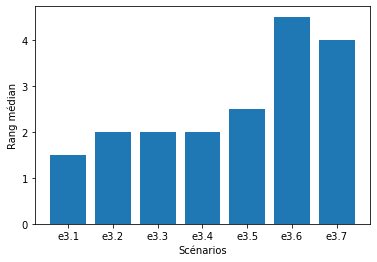

Global sensitivity index W  : [0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 3.5]
Global sensitivity index BK  : [[0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0], [0, -0.5, -0.5, -0.5, -0.5, 0]]
Global sensitivity index QPV  : [[0.0, 0.0, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0], [-0.5, -0.5, 0.0]]


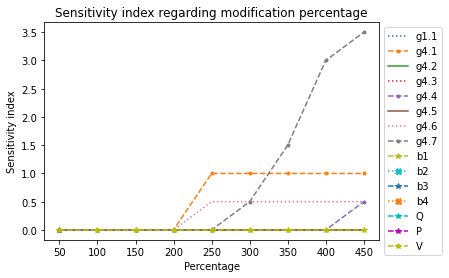

In [30]:
"""
        Make the sensitivity analysis of Electre Tri method
        Input data of Electre Tri method :
            Cat: Categories
            C: Criteria
            W: Weights
            A: Actions
            AP: Actions_performances
            BA: Boundary_actions
            BP: Boundary_actions_performances
            T: Thresholds
        """

Cat, C, W, A, AP, BA, BP, T = ELECTRE_Tri_B_function.input_data("Isolation")

# Initial Ranking
ordre_init = ELECTRE_Tri_B_function.ELECTRE_Tri(Cat, C, W, A, AP, BA, BP, T)
print("ordre initial", ordre_init)
plt.bar(list(ordre_init.keys()), list(ordre_init.values()))
plt.xlabel("Scénarios")
plt.ylabel("Rang médian")

sens_indexWglobal = []
sens_indexBKglobal = []
sens_indexQPVglobal = []
list_percent = []
#plt.figure(figsize=(12, 4))
x = 1
for percent_modification in range(0,500,50):
    if percent_modification == 0:
        continue
    list_percent.append(percent_modification)
    sens_indexW = indexW_calcul(ordre_init, percent_modification, C, A, AP, BA, BP, W, T)
    sens_indexBK = indexBK_calcul(ordre_init, percent_modification, C, A, AP, BA, BP, W, T)
    sens_indexQPV = indexQPV_calcul(ordre_init, percent_modification, C, A, AP, BA, BP, W, T)

    print(percent_modification, "Sensitivity index W : ", sens_indexW)
    print(percent_modification, "Sensitivity index BK : ", sens_indexBK)
    print(percent_modification, "Sensitivity index QPV : ", sens_indexQPV)

    #x = graphic(sens_indexW, sens_indexBK, sens_indexQPV, percent_modification, x)

    W2 = []
    for i in range(0, len(sens_indexW) - 1):
        W2.append(sens_indexW[i][0])
    sens_indexWglobal.append(W2)
    sens_indexBKglobal.append(sens_indexBK[5])
    sens_indexQPVglobal.append(sens_indexQPV[5])

plt.show()
print("Global sensitivity index W  :", W2)
print("Global sensitivity index BK  :", sens_indexBKglobal)
print("Global sensitivity index QPV  :", sens_indexQPVglobal)

global_graphic(C, BA, list_percent, sens_indexWglobal, sens_indexBKglobal, sens_indexQPVglobal, 4)
